## Parses the GTFS real time data into dictionary

In [ ]:
# https://opendata.samtrafiken.se/ul/VehiclePositions.pb?key=8e90cd12622a49449e473869721ca908

In [1]:
from google.transit import gtfs_realtime_pb2
import requests

vehicleDict = {}

feed = gtfs_realtime_pb2.FeedMessage()
response = requests.get('https://opendata.samtrafiken.se/ul/VehiclePositions.pb?key=8e90cd12622a49449e473869721ca908')
feed.ParseFromString(response.content)
for entity in feed.entity:
    vehicleDict[entity.id]={
                            'trip':entity.vehicle.trip.trip_id,
                            'lat':entity.vehicle.position.latitude,
                            'lon':entity.vehicle.position.longitude,
                            'speed':entity.vehicle.position.speed,
                            'timestamp':entity.vehicle.timestamp
                           }

In [81]:
import pandas as pd

vdf = pd.DataFrame.from_dict(vehicleDict,orient='index')
vdf

,trip,lat,lon,speed,bearing,timestamp
271126620,,59.845139,17.725971,0.0,200.0,1582279558
271126451,,60.143772,17.572660,0.0,224.0,1582279558
271126636,33010000131220820,59.857342,17.645958,0.0,312.0,1582279559
271124557,33010000129935296,59.864933,17.704517,10.8,55.0,1582279554
271126011,,59.852455,17.724852,0.0,357.0,1582279555
...,...,...,...,...,...,...
271126597,33010000131282059,59.849552,17.708517,0.0,179.0,1582279560
271125750,33010000131097079,59.866817,17.608267,9.2,330.0,1582279558
271126609,,59.852585,17.724348,0.0,166.0,1582279560
271126517,,59.855633,17.650518,0.0,45.0,1582279558


## Density function of all 463 timestamps

(array([  1.,   0.,   0.,   0.,   0.,   0.,   5.,   5.,  15., 437.]),
 array([1.58227907e+09, 1.58227912e+09, 1.58227917e+09, 1.58227922e+09,
        1.58227927e+09, 1.58227932e+09, 1.58227937e+09, 1.58227942e+09,
        1.58227947e+09, 1.58227952e+09, 1.58227956e+09]),
 <a list of 10 Patch objects>)

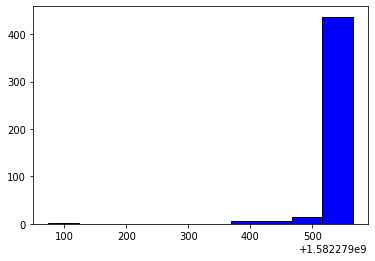

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(vdf['timestamp'], color = 'blue', edgecolor = 'black')